# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary

/tmp/ipykernel_17337/3017827741.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



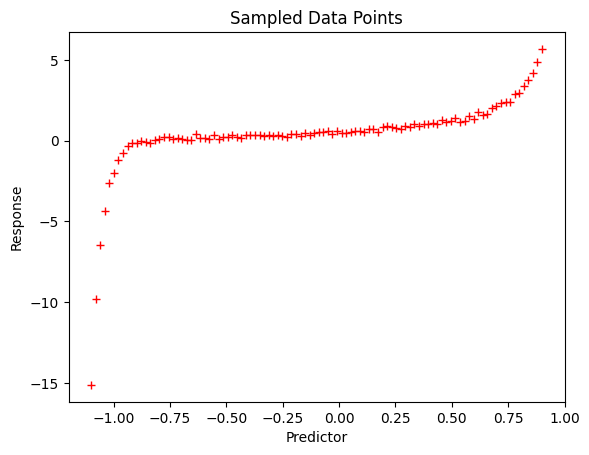

In [2]:
np.random.seed(0)
def gen_data( dimesnion):
    coeff = np.random.rand(dimesnion)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data(26)

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [3]:
# your code here
# your code here
# your code here
def line_fit(predictor,response,degree):
    X = []
    Y = []
    for i in range(len(predictor)):
        temp=[]
        for ind in range(1,degree+1):
            temp.append(predictor[i]**ind)
        temp.append(1)
        X.append(temp)
        Y.append(response[i])  # Corresponding Y values

    X_transpose = np.transpose(X)
    X_trans_X = np.matmul(X_transpose, X)
    X_trans_X_inverse = np.linalg.pinv(X_trans_X)
    X_trans_Y = np.matmul(X_transpose, Y)
    coefficients = np.matmul(X_trans_X_inverse, X_trans_Y)

    return coefficients



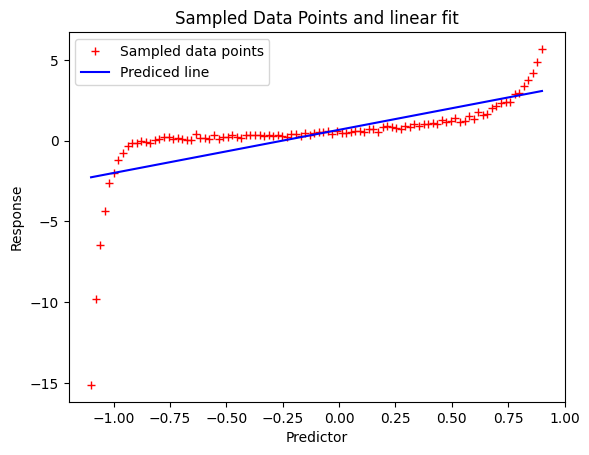

error is:3.2103033335176905


In [50]:
degree=1
coefficients=line_fit(predictor.T,response.T,degree)
x_corrdinator=[]
for i in range(len(predictor)):
        temp=[]
        for ind in range(1,degree+1):
            temp.append(predictor[i]**ind)
        temp.append(1)
        x_corrdinator.append(temp)
x_corrdinator=np.array(x_corrdinator)
predicted_response=np.matmul(x_corrdinator,coefficients)
n=len(response)
mse = sum((response - predicted_response)**2) / n
 

        
# predicted_response=predictor*slope+intercept
plt.plot(predictor, response, 'r+',label='Sampled data points')
plt.plot(predictor,predicted_response,'b-',label='Prediced line')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points and linear fit')

plt.legend()
plt.show()

print(f'error is:{mse}')





In [26]:
def gen_x(degree):
    x_corrdinator=[]
    for i in range(len(predictor)):
            temp=[]
            for ind in range(1,degree+1):
                temp.append(predictor[i]**ind)
            temp.append(1)
            x_corrdinator.append(temp)
    x_corrdinator=np.array(x_corrdinator)
    return x_corrdinator

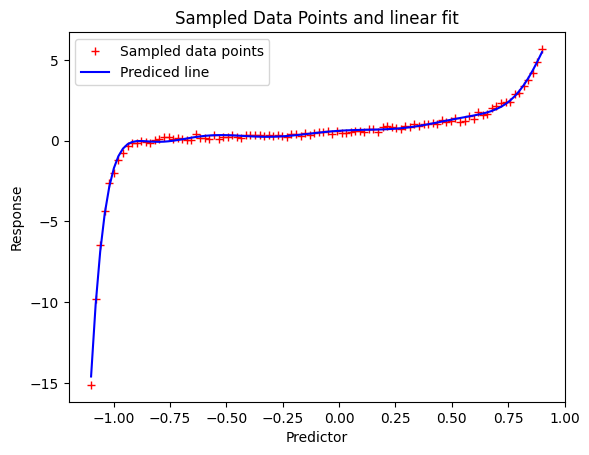

In [64]:
degree=[i for i in range(10,11)]
errors=[]
for i in degree:
    
    coefficients=line_fit(predictor.T,response.T,i)
    # print(coefficients)
    # print((predictor.T).shape)
    # print(response.T.shape)
    # predictor[:5]
    # print(intercept,slope)

    x_corrdinator=gen_x(i)
    predicted_response=np.matmul(x_corrdinator,coefficients)
   
 
    
    plt.plot(predictor, response, 'r+',label='Sampled data points')
    plt.plot(predictor,predicted_response,'b-',label='Prediced line')
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.title('Sampled Data Points and linear fit')

    plt.legend()
    plt.show()

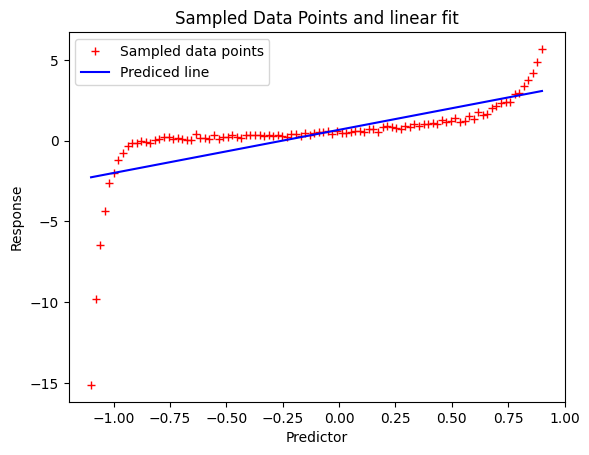

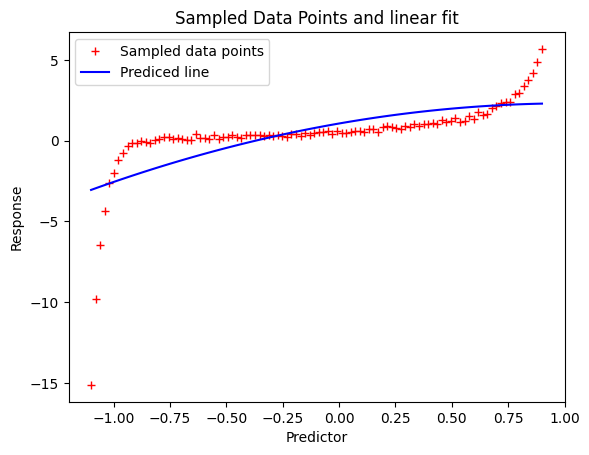

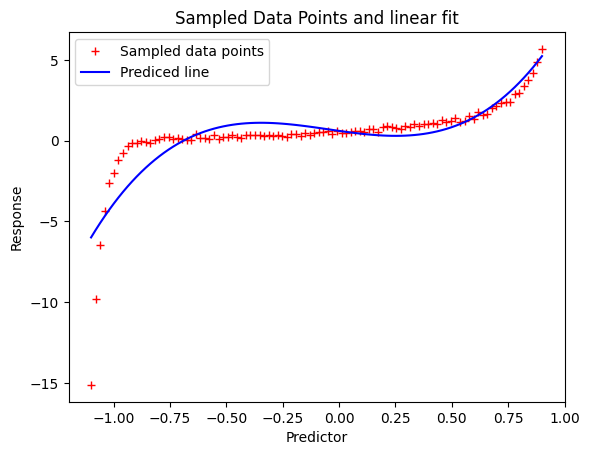

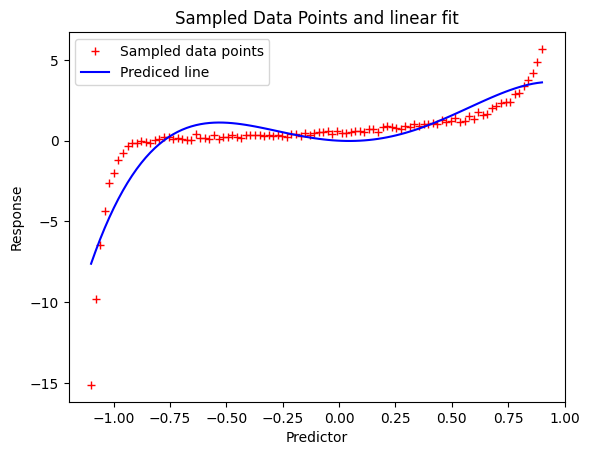

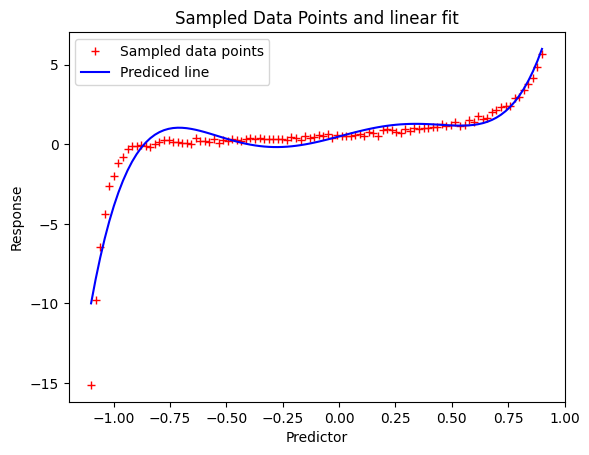

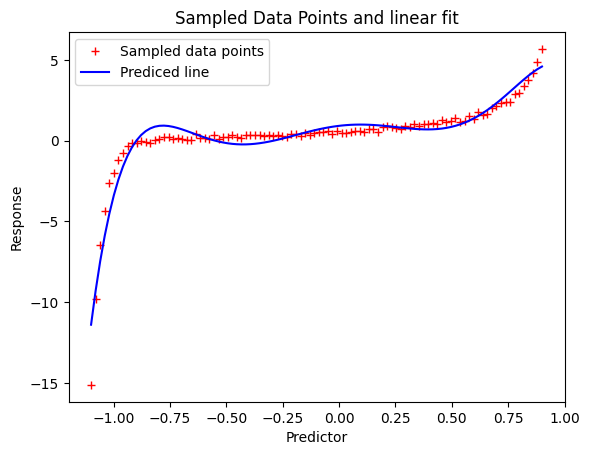

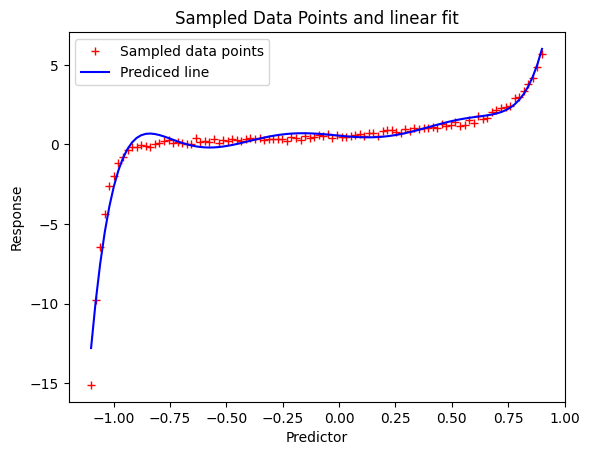

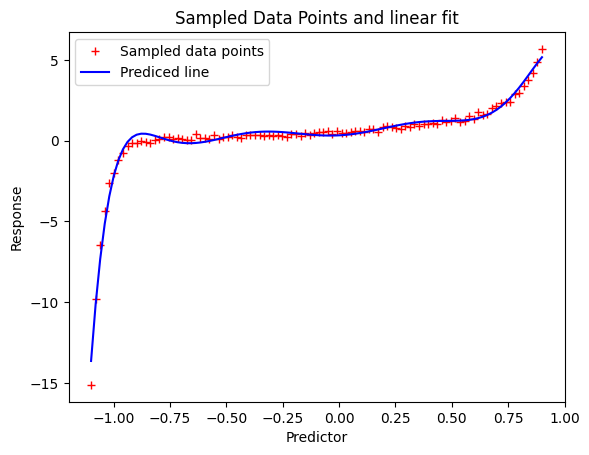

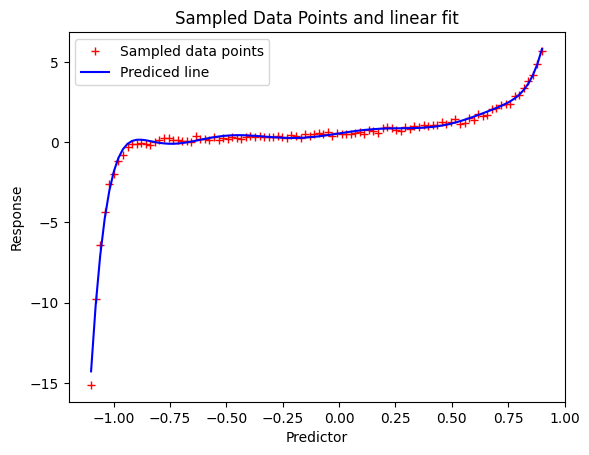

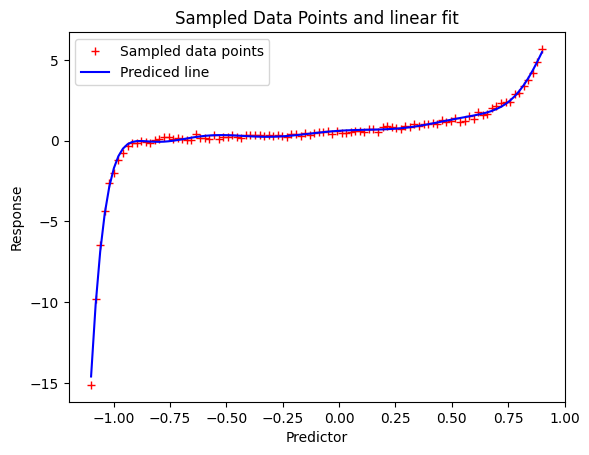

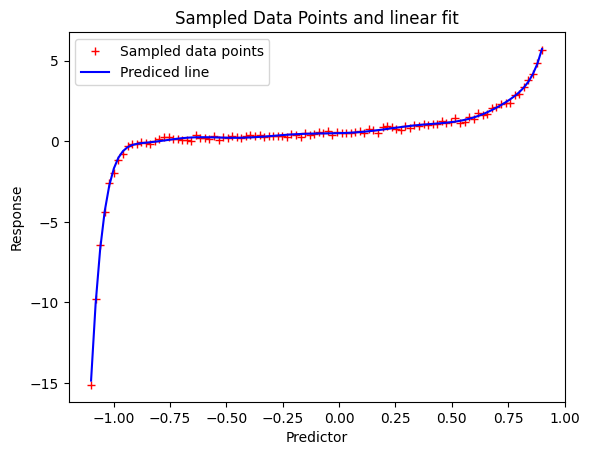

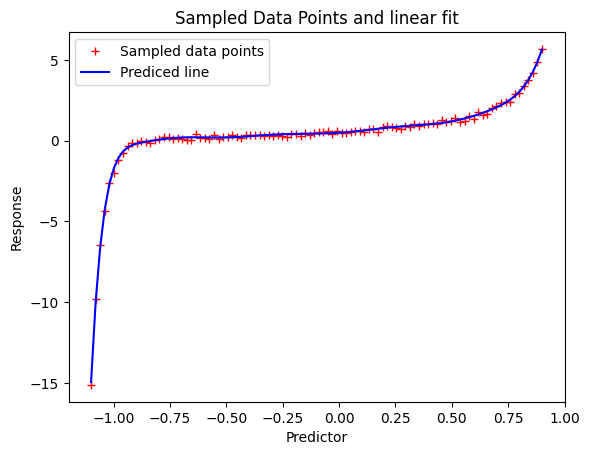

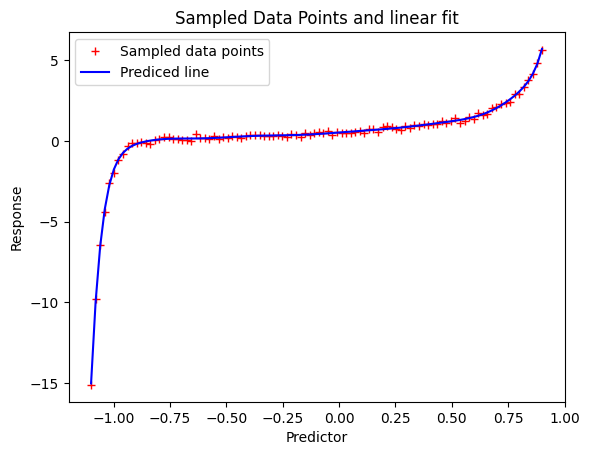

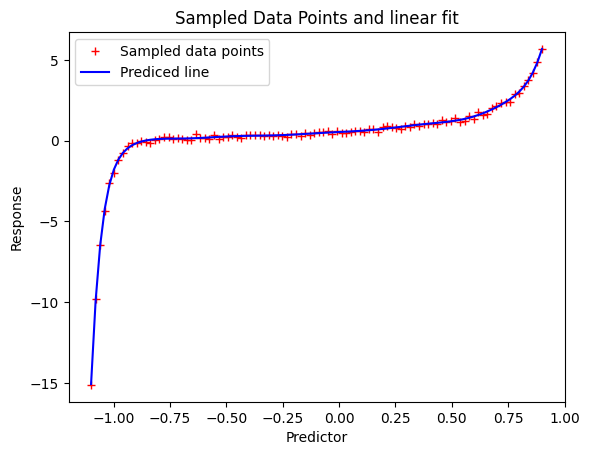

In [66]:
degree=[i for i in range(1,15)]
errors=[]
for i in degree:
    
    coefficients=line_fit(predictor.T,response.T,i)
    # print(coefficients)
    # print((predictor.T).shape)
    # print(response.T.shape)
    # predictor[:5]
    # print(intercept,slope)

    x_corrdinator=gen_x(i)
    predicted_response=np.matmul(x_corrdinator,coefficients)
    n=len(response)
    mse = sum((response - predicted_response)**2) / n
    errors.append(mse)
 

    plt.plot(predictor, response, 'r+',label='Sampled data points')
    plt.plot(predictor,predicted_response,'b-',label='Prediced line')
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.title('Sampled Data Points and linear fit')

    plt.legend()
    plt.show()

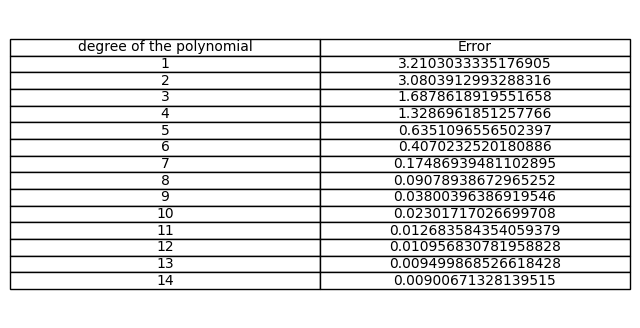

In [63]:
# Create a table with indices and errors
table_data = {'degree of the polynomial': list(range(1, len(errors)+1)), 'Error': errors}

# Convert dictionary keys to a list
table_columns = list(table_data.keys())

# Convert dictionary values to lists
table_values = [table_data[column] for column in table_columns]

# Plot the table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=list(zip(*table_values)), colLabels=table_columns, cellLoc='center', loc='center')

plt.show()

Observation: As the degree of the polynomial is increasing the MSE is decreasing and it can be observed from the plot as well as the table present above.

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

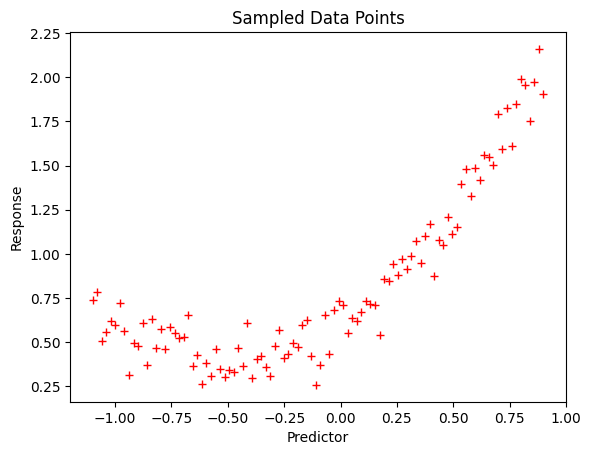

In [30]:
np.random.seed(0)
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [31]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate,epochs, lambda_parameter):

    self.learning_rate = learning_rate
    self.epochs = epochs
    self.lambda_parameter = lambda_parameter



  def fit(self, X, Y):

    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    for i in range(self.epochs):
      self.update_weights()
    return self

  def update_weights(self):
    

    Y_prediction = self.predict(self.X)
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>=0:
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m
      
      
      elif self.w[i]<0 :
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction) / self.m
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
    
    
  def predict(self,X):

    return X.dot(self.w) + self.b




(100, 11)
[0.497732   0.25682579 0.20914778 0.15685173 0.09837774 0.10227298
 0.04293852 0.07193254 0.01007654 0.05528246 0.3603987 ]
[0.61929771 0.33944658 0.23131237 0.20506969 0.09140306 0.12661135
 0.0237692  0.08173961 0.0010819  0.05622686 0.3284312 ]
[ 6.64513539e-01  3.91720435e-01  2.23824206e-01  2.25318193e-01
  7.40646532e-02  1.25477024e-01  2.95254194e-03  6.71384937e-02
 -3.60228451e-04  3.25903038e-02  3.06835032e-01]
[0.68794183 0.43212847 0.20834331 0.23694107 0.05312955 0.11839634
 0.00226309 0.04850013 0.00098583 0.00635041 0.28884958]
[7.05858673e-01 4.64543071e-01 1.92251636e-01 2.43405613e-01
 3.22215820e-02 1.08446763e-01 1.24777607e-03 2.87372811e-02
 3.08710396e-04 4.42730346e-04 2.72459495e-01]
[ 7.21028624e-01  4.91398525e-01  1.77354980e-01  2.45515776e-01
  1.34039648e-02  9.49662465e-02  2.57197002e-03  5.90884291e-03
 -1.94701551e-03 -2.81652270e-04  2.56971889e-01]


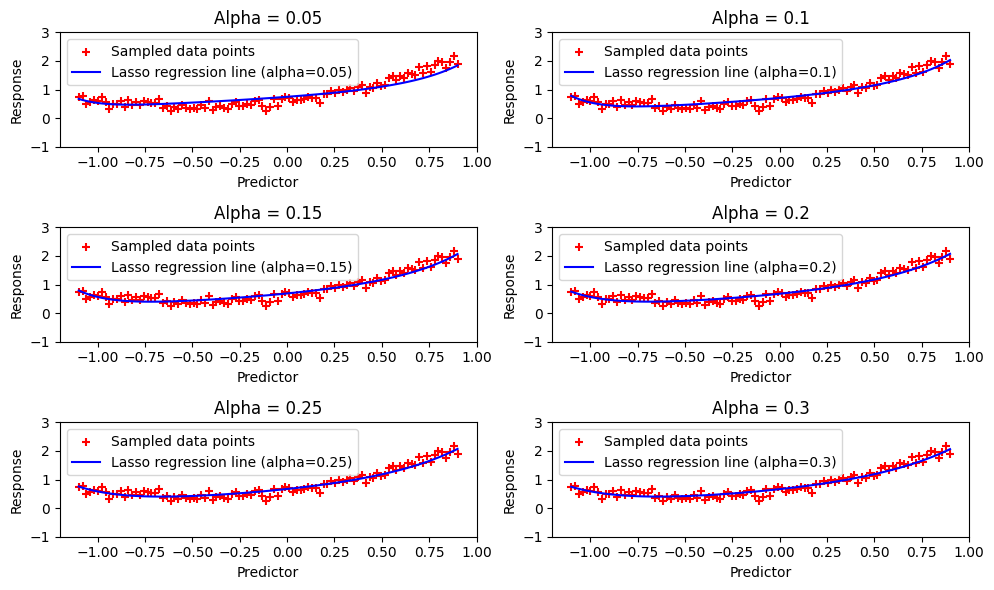

In [32]:

###L1 regression


degree=10

x_corrdinator=gen_x(degree) 


print(x_corrdinator.shape)


alphas =[0.05,0.1,0.15,0.2,0.25,0.3]


rows = len(alphas) // 2  # Adjust the number of rows as needed
cols = 2  # Number of columns in the grid

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(10, 2 * rows))

# Flatten the subplot array to iterate easily
axs = axs.flatten()
coefficients_matrix=[]

for i, alpha in enumerate(alphas):
 
    temp_model=Lasso_Regression(alpha,50,1)
    
    
    temp_model.fit(x_corrdinator, response_low)
    coefficients=temp_model.w+temp_model.b
   
    # Predicted response using the Lasso model
    predicted_response = temp_model.predict(x_corrdinator)
    print(temp_model.w)

    # Plotting the results in subplots
    axs[i].scatter(predictor_low, response_low, color='red', marker='+', label='Sampled data points')
    axs[i].plot(predictor_low, predicted_response, 'b-', label=f'Lasso regression line (alpha={alpha})')
    axs[i].set_xlabel('Predictor')
    axs[i].set_ylim(-1,3)
    axs[i].set_ylabel('Response')
    axs[i].set_title(f'Alpha = {alpha}')
    axs[i].legend()


# Adjust layout for better appearance
plt.tight_layout()
plt.show()


# Observation: from the value of coefficients we can observe that increasing the learning rate the coefficients are becoming very close to 0 or 0.
And this is also expected from the lasso regression . It helps the model not to overfit.

[0.49510198 0.26409673 0.2204958  0.16930014 0.11513397 0.11761807
 0.06143933 0.08887325 0.02910718 0.07302447 0.36158934]
[0.60172235 0.34242771 0.24738342 0.22076576 0.12118508 0.15018432
 0.06084334 0.10988423 0.02647483 0.08682706 0.33271112]
[0.63325758 0.38673873 0.24431112 0.24171025 0.11620268 0.15566803
 0.05986214 0.10551162 0.03067435 0.07549463 0.31596516]
[0.64652361 0.41687847 0.23481903 0.25221832 0.1085965  0.15378493
 0.05779255 0.09588991 0.034431   0.06042061 0.30355915]
[0.65545022 0.43944688 0.22475331 0.25831546 0.10065031 0.1499197
 0.05485108 0.08607189 0.03653553 0.04659798 0.29306306]
[0.66317972 0.45714885 0.21547978 0.26206987 0.09306498 0.14557077
 0.05142851 0.07714468 0.03722622 0.03481119 0.28367111]


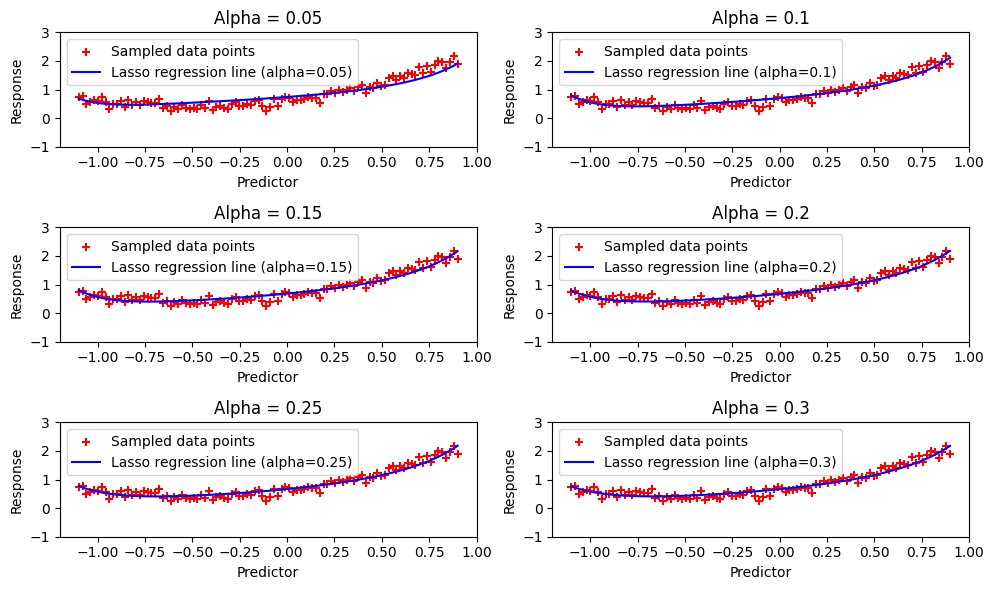

In [33]:


###L2regression
# creating a class for Lasso Regression

class Ridge_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate,epochs, lambda_parameter):

    self.learning_rate = learning_rate
    self.epochs = epochs
    self.lambda_parameter = lambda_parameter



  def fit(self, X, Y):

    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    for i in range(self.epochs):
      self.update_weights()
    return self

  def update_weights(self):
    

    Y_prediction = self.predict(self.X)
    dw = np.zeros(self.n)

    dw = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction ) ) +        ( 2 * self.lambda_parameter * self.w) ) / self.m
          
    db = - 2 * np.sum( self.Y - Y_prediction ) / self.m  
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
    
    
  def predict(self,X):

    return X.dot(self.w) + self.b




###L1 regression



alphas =[0.05,0.1,0.15,0.2,0.25,0.3]


rows = len(alphas) // 2  # Adjust the number of rows as needed
cols = 2  # Number of columns in the grid

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(10, 2 * rows))

# Flatten the subplot array to iterate easily
axs = axs.flatten()
coefficients_matrix=[]

for i, alpha in enumerate(alphas):
 
    temp_model=Ridge_Regression(alpha,50,1)
    
    
    temp_model.fit(x_corrdinator, response_low)
   
    # Predicted response using the Lasso model
    predicted_response = temp_model.predict(x_corrdinator)
    print(temp_model.w)

    # Plotting the results in subplots
    axs[i].scatter(predictor_low, response_low, color='red', marker='+', label='Sampled data points')
    axs[i].plot(predictor_low, predicted_response, 'b-', label=f'Lasso regression line (alpha={alpha})')
    axs[i].set_xlabel('Predictor')
    axs[i].set_ylim(-1,3)
    axs[i].set_ylabel('Response')
    axs[i].set_title(f'Alpha = {alpha}')
    axs[i].legend()


# Adjust layout for better appearance
plt.tight_layout()
plt.show()



# Observation: from the value of coefficients we can observe that increasing the learning rate the coefficients are becoming very close to 0 but not 0(contract to the case of lasso regression).
And this is also expected from the ridge regression . It helps the model not to overfit.

In [34]:
class my_regression:
    def __init__(self,X_train,Y_train,X_test,Y_test):
        self.coeff=None
        self.intercept=None
        self.X_train=X_train
        self.Y_train=Y_train
        self.X_test=X_test
        self.Y_test=Y_test
        self.Y_prediction=[]
        # print(X_train)
        
    
    def fit(self):
        
        self.X_train=np.insert(self.X_train,0,1,axis=1)
        weights=np.linalg.inv(np.dot(self.X_train.T,self.X_train)).dot(self.X_train.T).dot(self.Y_train)
        
        self.coeff=weights[1:]
        self.intercept=weights[0]
        
    
    def predict(self):
        self.Y_prediction=np.dot(self.X_test,self.coeff)+self.intercept
        
         
    
    def error(self):
        n=len(self.Y_prediction)
        mse = sum((self.Y_test - self.Y_prediction)**2) / n
        
        return mse
            
    

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [35]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [36]:

Y=credit["Balance"]
credit.drop("Balance",axis=1,inplace=True)
X=credit
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
my_model=my_regression(X_train,Y_train,X_test,Y_test)
my_model.fit()
my_model.predict()
my_model.error()



27903.673477256543

In [37]:
print(my_model.coeff)
print(my_model.intercept)

[-7.88699833  0.17157375  1.40495889 12.91673786 -0.71980907  1.45583914]
-455.0179587986553


In [38]:
X.drop("Limit",axis=1,inplace=True)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
my_model_2=my_regression(X_train,Y_train,X_test,Y_test)
my_model_2.fit()
my_model_2.predict()
my_model_2.error()


26904.985591177712

# The coefficient of the income column is very small . so i neglect the column of perform again regression. the error comes very simmilar to the previos one even it improve a bit. so i think Income column can be neglected.

In [39]:
print(my_model_2.coeff)
print(my_model_2.intercept)

[-7.92213364  3.97305214  0.82674821 -0.72924679  2.34108953]
-528.572904653671


In [82]:
# interaction effects between rating and age
Y = credit['Balance']
X=credit.drop("Balance",axis=1)
# Step 3: Add Interaction Term between Rating and Age
X['Rating_Age_Interaction'] = X['Rating'] * X['Age']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
my_model_inter=my_regression(X_train,Y_train,X_test,Y_test)
my_model_inter.fit()
my_model.predict()
error =my_model_inter.error
print(f'error is:{error}')
print(f'coefficient is:{my_model.coeff}')


error is:<bound method my_regression.error of <__main__.my_regression object at 0x7feed85af7c0>>
coefficient is:[-7.87464749e+00  1.71188181e-01  1.46006713e+00  1.27889453e+01
 -4.08280173e-01  1.44695082e+00 -8.58424569e-04]


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [83]:
sharks = pd.read_csv('shark_attacks.csv')
Y=sharks["SharkAttacks"]
sharks.drop("SharkAttacks",axis=1,inplace=True)
X=sharks

In [84]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
my_model_3=my_regression(X_train,Y_train,X_test,Y_test)
my_model_3.fit()
my_model_3.predict()
my_model_3.error()

43.969709675945175

In [85]:
X.drop("IceCreamSales",axis=1,inplace=True)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
my_model_4=my_regression(X_train,Y_train,X_test,Y_test)
my_model_4.fit()
my_model_4.predict()
my_model_4.error()

44.84033887480738

# prediction made without Ice cream is not decreasing the accuracy much. so by neglecting the IceCreams column we are not loosing much accuracy and model performs similar to the model trained with the data included the IceCreams column.